# Лабораторна робота 5
### Студента групи МІТ-31 (підгрупа 1)
### Дриги Михайла Сергійовича

## Завдання
1. Виконати вирішення задач регресії та класифікації для наборів даних, що використовувалися в лабораторних роботах 2,3 з використанням Tensorflow & NN
2. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab5.

In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse

In [52]:
model1 = pd.read_csv("titanic.csv")

In [53]:
insurance = model1
insurance.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [54]:
insurance.isna().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [55]:
insurance=pd.get_dummies(insurance)

insurance.head(3)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1


In [56]:
X=insurance.drop("Fare",axis=1)
y=insurance["Fare"]

X.head(), y.head()

(   Passengerid   Age  Sex  sibsp  zero  zero.1  zero.2  zero.3  zero.4  \
 0            1  22.0    0      1     0       0       0       0       0   
 1            2  38.0    1      1     0       0       0       0       0   
 2            3  26.0    1      0     0       0       0       0       0   
 3            4  35.0    1      1     0       0       0       0       0   
 4            5  35.0    0      0     0       0       0       0       0   
 
    zero.5  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
 0       0  ...        0        0        0       3        0        0       2.0   
 1       0  ...        0        0        0       1        0        0       0.0   
 2       0  ...        0        0        0       3        0        0       2.0   
 3       0  ...        0        0        0       1        0        0       2.0   
 4       0  ...        0        0        0       3        0        0       2.0   
 
    zero.17  zero.18  2urvived  
 0        0        0 

In [57]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)


tf.random.set_seed=48

ins_model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

ins_model.compile(
    loss='mse',
    optimizer=Adam(),
    metrics=['mse']
)

X_train.shape

(1047, 27)

In [58]:
ins_history = ins_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan         
Epoch 2/10
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 6/10
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 8/10
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 9/10
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 10/10
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan


In [59]:
ins_history2 = ins_model.fit(X_train,y_train,epochs=200, verbose=0)

score1=ins_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: nan - mse: nan


In [60]:
from tensorflow.keras.utils import plot_model
plot_model(ins_model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [61]:
ins_model.save("ins_model.h5")

ins_model_loaded=tf.keras.models.load_model("ins_model.h5")


y1=ins_model.predict(X_test)
y2=ins_model_loaded.predict(X_test)

(y1-y2).sum()

X_train.head()

,Passengerid,Age,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
996,997,28.0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
509,510,26.0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
946,947,10.0,0,4,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
1155,1156,30.0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0.0,0,0,0
211,212,35.0,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2.0,0,0,1


In [62]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

insurance2 = model1
insurance2.head(2)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1


In [64]:
ct = make_column_transformer(
    (MinMaxScaler(),["Age", "Sex","2urvived"]), 
    (OneHotEncoder(handle_unknown="ignore"),['zero.' +str(i) for i in range(1,17)])
)
X=insurance2.drop("Fare", axis=1)
y = insurance2["Fare"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

ct.fit(X_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

# tf.random.set_seed(48)

im3= tf.keras.Sequential([ 
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [65]:
im3.compile(
    loss=mae, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["mae"]
)
history_im3=im3.fit(X_train_norm,y_train,validation_split=0.3,epochs=30,verbose=0)

im3.evaluate(X_test_norm,y_test)

X_train.shape

9/9 [==============================] - 0s 2ms/step - loss: 22.4220 - mae: 22.4220


(1047, 27)

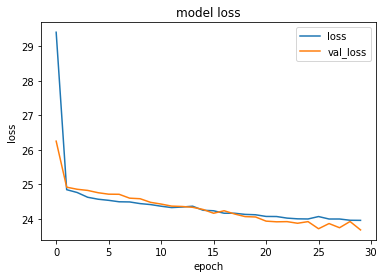

In [66]:
plt.plot(history_im3.history['loss'])
plt.plot(history_im3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [67]:
import numpy as np
import matplotlib as plt
import sklearn.model_selection
import sklearn.datasets
import pandas as pd
import seaborn as sns

In [68]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [69]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [70]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [71]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [72]:
train_labels[7]

2

In [73]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


len(class_names)

10

In [74]:

model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) 

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.4381 - accuracy: 0.1002 - val_loss: 2.2751 - val_accuracy: 0.1146
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0586 - accuracy: 0.1741 - val_loss: 1.7696 - val_accuracy: 0.2680
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7301 - accuracy: 0.2614 - val_loss: 1.7074 - val_accuracy: 0.2353
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6730 - accuracy: 0.2720 - val_loss: 1.7464 - val_accuracy: 0.2455
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6461 - accuracy: 0.2784 - val_loss: 1.6449 - val_accuracy: 0.2719
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6298 - accuracy: 0.2806 - val_loss: 1.6281 - val_accuracy: 0.2802
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6177 - accuracy: 0.2896 - val_loss: 1.6209 - val_accuracy:

In [75]:
train_data.min(), train_data.max()

train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [76]:
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1425 - accuracy: 0.5677 - val_loss: 0.8498 - val_accuracy: 0.7076
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7562 - accuracy: 0.7393 - val_loss: 0.7360 - val_accuracy: 0.7502
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6567 - accuracy: 0.7751 - val_loss: 0.6531 - val_accuracy: 0.7753
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6063 - accuracy: 0.7887 - val_loss: 0.6475 - val_accuracy: 0.7733
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5850 - accuracy: 0.7954 - val_loss: 0.6098 - val_accuracy: 0.7860
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5706 - accuracy: 0.7999 - val_loss: 0.6164 - val_accuracy: 0.7845
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5584 - accuracy: 0.8044 - val_loss: 0.6028 - val_accuracy:

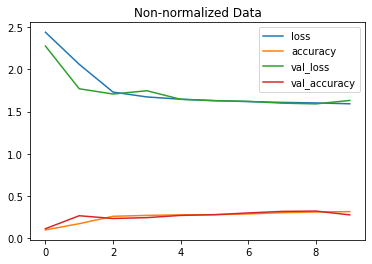

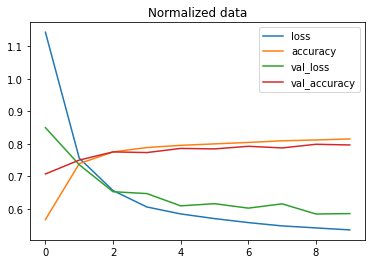

In [77]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [78]:
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, 
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4996 - accuracy: 0.4112 - val_loss: 1.1634 - val_accuracy: 0.5717
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0403 - accuracy: 0.6194 - val_loss: 0.9618 - val_accuracy: 0.6655
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8852 - accuracy: 0.6915 - val_loss: 0.8523 - val_accuracy: 0.7081
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8038 - accuracy: 0.7185 - val_loss: 0.8253 - val_accuracy: 0.7082
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7745 - accuracy: 0.7275 - val_loss: 0.7832 - val_accuracy: 0.7246
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7580 - accuracy: 0.7323 - val_loss: 0.7653 - val_accuracy: 0.7278
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7491 - accuracy: 0.7359 - val_loss: 0.7683 - val_accuracy:

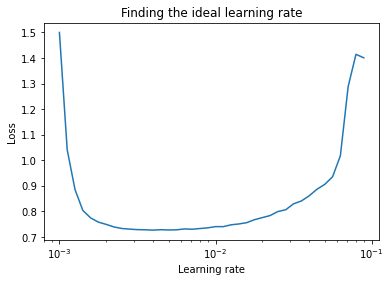

In [79]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), 
                 metrics=["accuracy"])

history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

In [ ]:
y_probs = model_14.predict(test_data) 

y_probs[:5]

In [ ]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

In [ ]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

In [ ]:
model_14.layers

In [ ]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

In [ ]:
biases, biases.shape

In [ ]:
model_14.summary()